## Conv1D

### Todos

* Somehow add multiple rides
* Checkpoints

In [94]:
%load_ext autoreload
%autoreload 2
%load_ext autotime

# add src to sys-path
import sys
import os
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sys.path.append('../src')

from data_processing.mtb_data_provider import MtbDataProvider
from visualization.visualize import MtbVisualizer
from models.conv1d_model import Conv1dModel
from models.conv2d_model import Conv2dModel

RAW_FILE = 'mspuebung'
VAL_FILE = 'dummy'

RAW_FILES = ['mspuebung', 'mspuebung']
VAL_FILES = ['dummy', 'dummy']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.55 ms


In [5]:
WINDOW_SIZE = 16000
FREQUENCY = 80
SAMPLE_SIZE = WINDOW_SIZE // FREQUENCY

time: 809 µs


### Prepare data

#### Conv1D, 1 Sensor

In [79]:
X_train, y_train = MtbDataProvider.load_data('../data/raw/' + RAW_FILE + '.csv', frequency=FREQUENCY)
X_train, y_train = MtbDataProvider.slice_single_sensor(X_train, y_train, window_size=WINDOW_SIZE, frequency=FREQUENCY)
X_train.shape

(41, 200, 3)

time: 26.4 ms


In [71]:
X_dev, y_dev = MtbDataProvider.load_data('../data/raw/' + VAL_FILE + '.csv', frequency=FREQUENCY)
X_dev, y_dev = MtbDataProvider.slice_single_sensor(X_dev, y_dev, window_size=WINDOW_SIZE, frequency=FREQUENCY)

time: 15.6 ms


#### Conv2d, multiple Sensors

In [98]:
sensors = []
labels = None
for raw_file in RAW_FILES:
    X, y = MtbDataProvider.load_data('../data/raw/' + raw_file + '.csv', frequency=FREQUENCY)
    sensors.append(X)
    if labels is None:
        labels = y

X_train = MtbDataProvider.sync_sensors(np.asarray(sensors))

X_train, y_train = MtbDataProvider.slice_multiple_sensors(X_train, y1, window_size=WINDOW_SIZE, frequency=FREQUENCY)
X_train.shape

(41, 200, 2, 3)

time: 102 ms


In [99]:
sensors = []
labels = None
for val_file in VAL_FILES:
    X, y = MtbDataProvider.load_data('../data/raw/' + val_file + '.csv', frequency=FREQUENCY)
    sensors.append(X)
    if labels is None:
        labels = y

X_dev = MtbDataProvider.sync_sensors(np.asarray(sensors))

X_dev, y_dev = MtbDataProvider.slice_multiple_sensors(X_dev, labels, window_size=WINDOW_SIZE, frequency=FREQUENCY)
X_dev.shape

(18, 200, 2, 3)

time: 59.7 ms


## Evaluation

### Conv1D, 1 Sensor

In [ ]:
model_cnn1 = Conv1dModel.build_model(input_shape=X_train[0].shape)

In [ ]:
model_cnn1.summary()

In [ ]:
model_cnn1.fit(X_train, y_train,
              epochs=1000,
              batch_size=32,
              validation_data=(X_dev, y_dev))

### Conv2D, Multiple Sensors

In [100]:
model_cnn2 = Conv2dModel.build_model(input_shape=X_train[0].shape, kernel_size=(5, X_train.shape[2]))

time: 360 ms


In [101]:
model_cnn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 200, 2, 3)         93        
_________________________________________________________________
batch_normalization_10 (Batc (None, 200, 2, 3)         12        
_________________________________________________________________
activation_10 (Activation)   (None, 200, 2, 3)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 200, 2, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 200, 2, 3)         93        
_________________________________________________________________
batch_normalization_11 (Batc (None, 200, 2, 3)         12        
_________________________________________________________________
activation_11 (Activation)   (None, 200, 2, 3)         0         
__________

In [102]:
model_cnn2.fit(X_train, y_train,
              epochs=1000,
              batch_size=32,
              validation_data=(X_dev, y_dev))

Train on 41 samples, validate on 18 samples
Epoch 1/1000
41/41 [==============================] - 1s 24ms/step - loss: 0.9281 - sparse_categorical_accuracy: 0.6341 - val_loss: 1.7279 - val_sparse_categorical_accuracy: 0.1667
Epoch 2/1000
41/41 [==============================] - 0s 688us/step - loss: 0.4320 - sparse_categorical_accuracy: 0.8780 - val_loss: 2.1686 - val_sparse_categorical_accuracy: 0.1667
Epoch 3/1000
41/41 [==============================] - 0s 775us/step - loss: 0.3731 - sparse_categorical_accuracy: 0.9268 - val_loss: 2.6315 - val_sparse_categorical_accuracy: 0.0556
Epoch 4/1000
41/41 [==============================] - 0s 814us/step - loss: 0.2259 - sparse_categorical_accuracy: 0.9268 - val_loss: 2.9997 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/1000
41/41 [==============================] - 0s 822us/step - loss: 0.0993 - sparse_categorical_accuracy: 0.9756 - val_loss: 3.2596 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 6/1000
41/41 [===================

41/41 [==============================] - 0s 797us/step - loss: 6.7967e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 5.6534 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 45/1000
41/41 [==============================] - 0s 803us/step - loss: 6.4329e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 5.8105 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 46/1000
41/41 [==============================] - 0s 834us/step - loss: 5.8974e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 5.9370 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 47/1000
41/41 [==============================] - 0s 810us/step - loss: 4.2076e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.0492 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 48/1000
41/41 [==============================] - 0s 773us/step - loss: 0.0043 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.1775 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 49/1000
41/41 [==============================] - 0s 802us

41/41 [==============================] - 0s 759us/step - loss: 0.0026 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.4220 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 88/1000
41/41 [==============================] - 0s 775us/step - loss: 0.0035 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.4577 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 89/1000
41/41 [==============================] - 0s 789us/step - loss: 0.0014 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.5222 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 90/1000
41/41 [==============================] - 0s 831us/step - loss: 7.7648e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.5902 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 91/1000
41/41 [==============================] - 0s 818us/step - loss: 3.4800e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.6508 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 92/1000
41/41 [==============================] - 0s 824us/step - 

Epoch 130/1000
41/41 [==============================] - 0s 823us/step - loss: 1.5737e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.9878 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 131/1000
41/41 [==============================] - 0s 868us/step - loss: 2.2965e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.9968 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 132/1000
41/41 [==============================] - 0s 838us/step - loss: 1.6791e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.0003 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 133/1000
41/41 [==============================] - 0s 827us/step - loss: 2.7442e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.9981 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 134/1000
41/41 [==============================] - 0s 850us/step - loss: 4.6993e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.0254 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 135/1000
41/41 [==================

Epoch 173/1000
41/41 [==============================] - 0s 807us/step - loss: 1.2613e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.3101 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 174/1000
41/41 [==============================] - 0s 763us/step - loss: 1.0547e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.3944 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 175/1000
41/41 [==============================] - 0s 821us/step - loss: 2.0984e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.4689 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 176/1000
41/41 [==============================] - 0s 811us/step - loss: 3.7240e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.5262 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 177/1000
41/41 [==============================] - 0s 822us/step - loss: 1.5118e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.5834 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 178/1000
41/41 [==================

Epoch 216/1000
41/41 [==============================] - 0s 800us/step - loss: 2.3544e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.6287 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 217/1000
41/41 [==============================] - 0s 816us/step - loss: 6.6923e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.6879 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 218/1000
41/41 [==============================] - 0s 777us/step - loss: 9.3686e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.7419 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 219/1000
41/41 [==============================] - 0s 801us/step - loss: 6.2298e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.7824 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 220/1000
41/41 [==============================] - 0s 784us/step - loss: 1.5446e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.8293 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 221/1000
41/41 [==================

Epoch 259/1000
41/41 [==============================] - 0s 839us/step - loss: 4.7251e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 8.8039 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 260/1000
41/41 [==============================] - 0s 857us/step - loss: 6.4750e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 8.8142 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 261/1000
41/41 [==============================] - 0s 820us/step - loss: 8.0460e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 8.8319 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 262/1000
41/41 [==============================] - 0s 842us/step - loss: 9.8001e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 8.8471 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 263/1000
41/41 [==============================] - 0s 824us/step - loss: 6.3819e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 8.8779 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 264/1000
41/41 [==================

Epoch 302/1000
41/41 [==============================] - 0s 802us/step - loss: 5.6405e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.9940 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 303/1000
41/41 [==============================] - 0s 788us/step - loss: 5.9581e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.9963 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 304/1000
41/41 [==============================] - 0s 831us/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.9361 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 305/1000
41/41 [==============================] - 0s 794us/step - loss: 1.4989e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.8174 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 306/1000
41/41 [==============================] - 0s 806us/step - loss: 6.2696e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.7112 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 307/1000
41/41 [======================

Epoch 345/1000
41/41 [==============================] - 0s 815us/step - loss: 2.3459e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.8937 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 346/1000
41/41 [==============================] - 0s 812us/step - loss: 6.1444e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.8841 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 347/1000
41/41 [==============================] - 0s 775us/step - loss: 1.8070e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.8833 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 348/1000
41/41 [==============================] - 0s 780us/step - loss: 2.0029e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.8853 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 349/1000
41/41 [==============================] - 0s 845us/step - loss: 1.6067e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.8916 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 350/1000
41/41 [==================

41/41 [==============================] - 0s 820us/step - loss: 1.0540e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2446 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 388/1000
41/41 [==============================] - 0s 781us/step - loss: 1.5747e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2489 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 389/1000
41/41 [==============================] - 0s 831us/step - loss: 2.3951e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2418 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 390/1000
41/41 [==============================] - 0s 832us/step - loss: 1.0987e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2496 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 391/1000
41/41 [==============================] - 0s 852us/step - loss: 5.7477e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2602 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 392/1000
41/41 [============================

41/41 [==============================] - 0s 815us/step - loss: 1.1394e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2083 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 430/1000
41/41 [==============================] - 0s 828us/step - loss: 1.4659e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2138 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 431/1000
41/41 [==============================] - 0s 824us/step - loss: 5.3415e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2192 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 432/1000
41/41 [==============================] - 0s 831us/step - loss: 1.3330e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2345 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 433/1000
41/41 [==============================] - 0s 832us/step - loss: 4.7685e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2471 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 434/1000
41/41 [============================

41/41 [==============================] - 0s 801us/step - loss: 1.6879e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2458 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 472/1000
41/41 [==============================] - 0s 837us/step - loss: 1.4877e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2552 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 473/1000
41/41 [==============================] - 0s 808us/step - loss: 1.6075e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2530 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 474/1000
41/41 [==============================] - 0s 787us/step - loss: 7.3793e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2551 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 475/1000
41/41 [==============================] - 0s 794us/step - loss: 8.5980e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2158 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 476/1000
41/41 [============================

Epoch 514/1000
41/41 [==============================] - 0s 774us/step - loss: 3.1586e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2275 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 515/1000
41/41 [==============================] - 0s 796us/step - loss: 4.0182e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2653 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 516/1000
41/41 [==============================] - 0s 790us/step - loss: 1.5057e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2890 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 517/1000
41/41 [==============================] - 0s 786us/step - loss: 4.2667e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3140 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 518/1000
41/41 [==============================] - 0s 839us/step - loss: 3.6358e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3353 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 519/1000
41/41 [=============

41/41 [==============================] - 0s 779us/step - loss: 2.9187e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.9373 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 557/1000
41/41 [==============================] - 0s 800us/step - loss: 1.5837e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.9489 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 558/1000
41/41 [==============================] - 0s 823us/step - loss: 4.9876e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.9618 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 559/1000
41/41 [==============================] - 0s 833us/step - loss: 1.6456e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.9795 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 560/1000
41/41 [==============================] - 0s 834us/step - loss: 2.5529e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.9895 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 561/1000
41/41 [==============================] -

41/41 [==============================] - 0s 803us/step - loss: 2.6155e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.6639 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 599/1000
41/41 [==============================] - 0s 799us/step - loss: 2.5059e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.6446 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 600/1000
41/41 [==============================] - 0s 835us/step - loss: 3.3538e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.6315 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 601/1000
41/41 [==============================] - 0s 811us/step - loss: 2.3280e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.6299 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 602/1000
41/41 [==============================] - 0s 814us/step - loss: 3.1865e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.6395 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 603/1000
41/41 [==============================] -

Epoch 641/1000
41/41 [==============================] - 0s 833us/step - loss: 7.4461e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.1362 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 642/1000
41/41 [==============================] - 0s 827us/step - loss: 4.4179e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.1415 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 643/1000
41/41 [==============================] - 0s 800us/step - loss: 4.2857e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.1538 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 644/1000
41/41 [==============================] - 0s 819us/step - loss: 6.8015e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.1610 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 645/1000
41/41 [==============================] - 0s 847us/step - loss: 6.8617e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.1480 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 646/1000
41/41 [=============

41/41 [==============================] - 0s 786us/step - loss: 6.0796e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.0684 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 684/1000
41/41 [==============================] - 0s 741us/step - loss: 7.8095e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.0738 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 685/1000
41/41 [==============================] - 0s 759us/step - loss: 2.1706e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.0792 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 686/1000
41/41 [==============================] - 0s 787us/step - loss: 5.2888e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.0860 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 687/1000
41/41 [==============================] - 0s 801us/step - loss: 7.7485e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.0960 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 688/1000
41/41 [============================

41/41 [==============================] - 0s 803us/step - loss: 5.6202e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3403 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 726/1000
41/41 [==============================] - 0s 797us/step - loss: 3.6111e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3369 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 727/1000
41/41 [==============================] - 0s 774us/step - loss: 1.6430e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3347 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 728/1000
41/41 [==============================] - 0s 763us/step - loss: 2.0502e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3001 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 729/1000
41/41 [==============================] - 0s 786us/step - loss: 5.4254e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2408 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 730/1000
41/41 [============================

41/41 [==============================] - 0s 782us/step - loss: 4.0502e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.1166 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 768/1000
41/41 [==============================] - 0s 773us/step - loss: 5.8935e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.1101 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 769/1000
41/41 [==============================] - 0s 806us/step - loss: 3.4774e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.1148 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 770/1000
41/41 [==============================] - 0s 803us/step - loss: 4.6549e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.1283 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 771/1000
41/41 [==============================] - 0s 789us/step - loss: 5.0474e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.1372 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 772/1000
41/41 [============================

41/41 [==============================] - 0s 833us/step - loss: 2.3593e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3190 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 810/1000
41/41 [==============================] - 0s 800us/step - loss: 2.4085e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3119 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 811/1000
41/41 [==============================] - 0s 809us/step - loss: 5.6842e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3082 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 812/1000
41/41 [==============================] - 0s 781us/step - loss: 4.7363e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3074 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 813/1000
41/41 [==============================] - 0s 806us/step - loss: 1.1762e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3123 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 814/1000
41/41 [============================

41/41 [==============================] - 0s 774us/step - loss: 2.6313e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3483 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 852/1000
41/41 [==============================] - 0s 765us/step - loss: 4.2130e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3385 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 853/1000
41/41 [==============================] - 0s 806us/step - loss: 2.1981e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3342 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 854/1000
41/41 [==============================] - 0s 831us/step - loss: 6.3296e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3371 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 855/1000
41/41 [==============================] - 0s 797us/step - loss: 3.4687e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3363 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 856/1000
41/41 [============================

41/41 [==============================] - 0s 777us/step - loss: 3.1634e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3699 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 894/1000
41/41 [==============================] - 0s 784us/step - loss: 2.1317e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3754 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 895/1000
41/41 [==============================] - 0s 814us/step - loss: 1.9510e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3731 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 896/1000
41/41 [==============================] - 0s 818us/step - loss: 3.6867e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3637 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 897/1000
41/41 [==============================] - 0s 825us/step - loss: 4.7829e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.3549 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 898/1000
41/41 [============================

41/41 [==============================] - 0s 787us/step - loss: 8.7601e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2560 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 936/1000
41/41 [==============================] - 0s 776us/step - loss: 3.6577e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2454 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 937/1000
41/41 [==============================] - 0s 826us/step - loss: 3.8234e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2317 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 938/1000
41/41 [==============================] - 0s 793us/step - loss: 2.3755e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2216 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 939/1000
41/41 [==============================] - 0s 792us/step - loss: 4.7509e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.2053 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 940/1000
41/41 [============================

41/41 [==============================] - 0s 794us/step - loss: 6.1116e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.7930 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 978/1000
41/41 [==============================] - 0s 787us/step - loss: 3.9613e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.8036 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 979/1000
41/41 [==============================] - 0s 791us/step - loss: 9.3358e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.8207 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 980/1000
41/41 [==============================] - 0s 779us/step - loss: 7.6205e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.8317 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 981/1000
41/41 [==============================] - 0s 777us/step - loss: 6.7164e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 9.8492 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 982/1000
41/41 [==============================] -

time: 35.2 s


### Predict

#### Conv1D, 1 Sensor

In [ ]:
y_pred_dev = model_cnn1.predict(X_dev)
y_pred_dev = np.argmax(y_pred_dev, axis=1)

#### Conv2d, multiple Sensors

In [106]:
y_pred_dev = model_cnn2.predict(X_dev)
y_pred_dev = np.argmax(y_pred_dev, axis=1)

time: 4.44 ms


### Predicted results

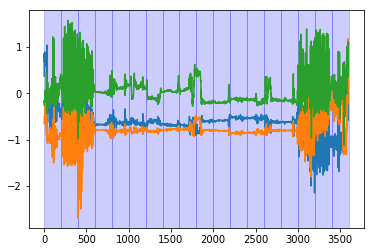

time: 176 ms


In [116]:
# This only plots the first sensor
X_dev_plot = X_dev if len(X_dev.shape) <= 3 else X_dev[:,:,0]

MtbVisualizer.plot_results(X_dev_plot, y_pred_dev, SAMPLE_SIZE)

### Actual results

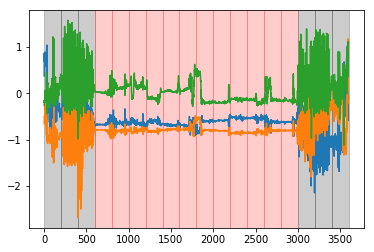

time: 178 ms


In [118]:
MtbVisualizer.plot_results(X_dev_plot, y_dev, SAMPLE_SIZE)

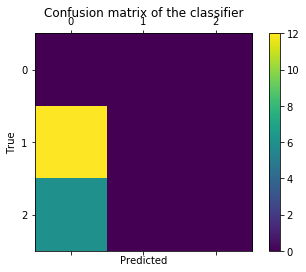

time: 157 ms


In [119]:
MtbVisualizer.print_confusion_matrix(y_dev, y_pred_dev)

### Test on Train data

In [121]:
#y_pred_train = model_cnn1.predict(X_train)
y_pred_train = model_cnn2.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)

time: 9.64 ms


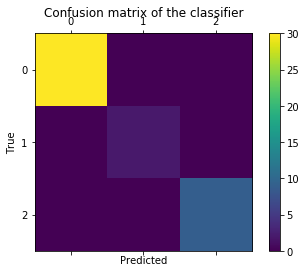

time: 150 ms


In [122]:
MtbVisualizer.print_confusion_matrix(y_train, y_pred_train)

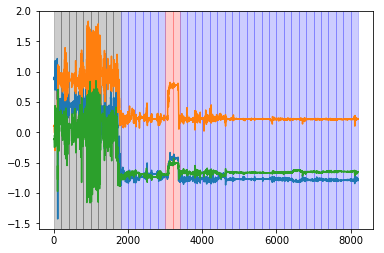

time: 217 ms


In [124]:
# This only plots the first sensor
X_train_plot = X_train if len(X_train.shape) <= 3 else X_train[:,:,0]

MtbVisualizer.plot_results(X_train_plot, y_pred_train, SAMPLE_SIZE)

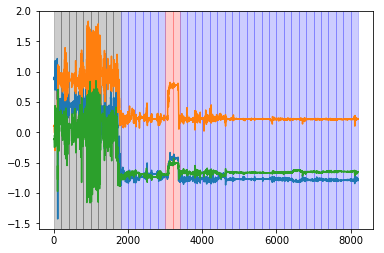

time: 215 ms


In [127]:
MtbVisualizer.plot_results(X_train_plot, y_train, SAMPLE_SIZE)